<a href="https://colab.research.google.com/github/Exabyte-io/api-examples/blob/dev/other/jarvis/run_job_using_material_from_jarvis_db.ipynb" target="_parent">
<img alt="Open in Google Colab" src="https://user-images.githubusercontent.com/20477508/128780728-491fea90-9b23-495f-a091-11681150db37.jpeg" width="150" border="0">
</a>

## Install Packages
First, install `express-py` which includes `jarvis-tools` as dependency.

In [1]:
!pip install express-py==2024.1.25.post7

INFO: pip is looking at multiple versions of pymatgen to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pymatgen to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [1]:
pip install intermat

  Using cached intermat-2024.3.24-py2.py3-none-any.whl.metadata (30 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.1 MB/s eta 0:00:00


In [2]:
from jarvis.db.jsonutils import dumpjson,loadjson
from jarvis.db.jsonutils import dumpjson
import plotly.graph_objects as go

config = {'calculator_method': 'ewald',
 'disp_intvl': 0.1,
 'film_index': '1_1_0',
 'film_jid': 'JVASP-1002',
 'substrate_index': '1_1_0',
 'substrate_jid': 'JVASP-1174'}

dumpjson(data=config,filename='config_example2.json')
!run_intermat.py --config_file config_example2.json >out2

res=loadjson('intermat_results.json')

100% 40.8M/40.8M [00:00<00:00, 59.2MiB/s]
/usr/local/lib/python3.10/dist-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/intermat/generate.py:52: RuntimeWarning: invalid value encountered in double_scalars
  strain_x = (
/usr/local/lib/python3.10/dist-packages/intermat/generate.py:55: RuntimeWarning: invalid value encountered in double_scalars
  strain_y = (
100% 100/100 [00:20<00:00,  4.99it/s]


(0.0, 9.0, 0.0, 9.0)

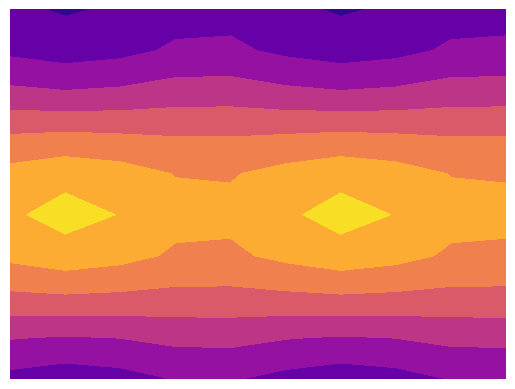

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.contourf(res['wads'],cmap='plasma')
plt.axis('off')


In [4]:
print(res.keys())

dict_keys(['systems', 'time_taken', 'wads'])


In [6]:
from jarvis.core.atoms import Atoms

intf = Atoms.from_dict(res['systems'])
print (intf)

System
1.0
-0.0 5.73163 -0.0
8.10575 -0.0 -0.0
-0.0 -0.0 -26.34364366645526
As Ga Si 
12 12 24 
direct
0.12500000000000017 0.033333436916792386 0.8511499074085056 bottom
0.12500000000000017 0.5333333678611532 0.6973034974115482 bottom
0.12500000000000017 0.033333298805513695 0.5434570874145908 bottom
0.12500000000000017 0.5333332297498745 0.5434570874145905 bottom
0.12500000000000017 0.033333298805513695 0.6973034974115482 bottom
0.12500000000000017 0.5333333678611529 0.8511499074085056 bottom
0.6249999999999999 -0.21666666666666684 0.6203802924130692 bottom
0.6249999999999999 0.28333340238897264 0.7742267024100271 bottom
0.6249999999999999 -0.2166665285553881 0.9280731124069845 bottom
0.6249999999999999 0.28333340238897264 0.9280731124069845 bottom
0.6249999999999999 -0.21666666666666684 0.7742267024100271 bottom
0.6249999999999999 0.2833332642776941 0.6203802924130692 bottom
0.37499999999999994 0.28333340238897264 0.8511499074085056 bottom
0.37499999999999994 -0.21666666666666684 0.6

In [7]:
pos_subs="""GaAs
1.0
3.509895098013499 -6.584084e-10 2.026439508259945
1.169965032050413 3.3091606691404545 2.026439508259945
-1.8622597e-09 -1.3168164e-09 4.052878022970947
Ga As
1 1
Cartesian
0.0 0.0 0.0
1.1699675 0.82729 2.02644
"""

pos_film="""Si2
1.0
3.3641499856336465 -2.5027128e-09 1.94229273881412
1.121382991333525 3.1717517190189715 1.9422927388141193
-2.5909987e-09 -1.8321133e-09 3.884586486670313
Si
2
Cartesian
3.92483875 2.77528125 6.7980237500000005
0.56069125 0.39646875 0.9711462500000001
"""
with open('pos_film','w') as f:
  f.write(pos_film)

with open('pos_subs','w') as f:
  f.write(pos_subs)

In [10]:
from jarvis.db.jsonutils import dumpjson,loadjson
from jarvis.db.jsonutils import dumpjson
import plotly.graph_objects as go

config = {'calculator_method': 'ewald',
 'disp_intvl': 0.1,
 'film_file_path': 'pos_film',
 'substrate_file_path': 'pos_subs',
 'film_index': '1_1_0',
 'substrate_index': '1_1_0'}

dumpjson(data=config,filename='config_example2.json')
!run_intermat.py --config_file config_example2.json >out2

res=loadjson('intermat_results.json')

/usr/local/lib/python3.10/dist-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/intermat/generate.py:52: RuntimeWarning: invalid value encountered in double_scalars
  strain_x = (
/usr/local/lib/python3.10/dist-packages/intermat/generate.py:55: RuntimeWarning: invalid value encountered in double_scalars
  strain_y = (
100% 100/100 [00:32<00:00,  3.05it/s]


(0.0, 9.0, 0.0, 9.0)

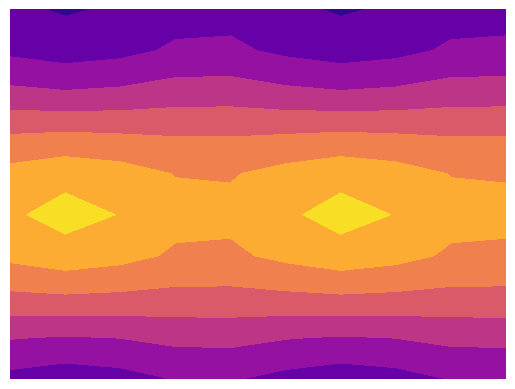

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.contourf(res['wads'],cmap='plasma')
plt.axis('off')


In [12]:
from jarvis.core.atoms import Atoms

intf = Atoms.from_dict(res['systems'])
print (intf)

System
1.0
-0.0 5.73163 -0.0
8.10575 -0.0 -0.0
-0.0 -0.0 -26.34364366645526
As Ga Si 
12 12 24 
direct
0.12500000000000017 0.033333436916792386 0.8511499074085056 bottom
0.12500000000000017 0.5333333678611532 0.6973034974115482 bottom
0.12500000000000017 0.033333298805513695 0.5434570874145908 bottom
0.12500000000000017 0.5333332297498745 0.5434570874145905 bottom
0.12500000000000017 0.033333298805513695 0.6973034974115482 bottom
0.12500000000000017 0.5333333678611529 0.8511499074085056 bottom
0.6249999999999999 -0.21666666666666684 0.6203802924130692 bottom
0.6249999999999999 0.28333340238897264 0.7742267024100271 bottom
0.6249999999999999 -0.2166665285553881 0.9280731124069845 bottom
0.6249999999999999 0.28333340238897264 0.9280731124069845 bottom
0.6249999999999999 -0.21666666666666684 0.7742267024100271 bottom
0.6249999999999999 0.2833332642776941 0.6203802924130692 bottom
0.37499999999999994 0.28333340238897264 0.8511499074085056 bottom
0.37499999999999994 -0.21666666666666684 0.6

## Get Materials Data From JARVIS
Then, let"s get the dataset containing 2D materials from JARVIS and wrap it into a pandas dataframe.

In [ ]:
import pandas as pd
from jarvis.db.figshare import data, get_jid_data

dft_2d = data("dft_2d")
df = pd.DataFrame(dft_2d)

## Create a simple heterostructure

We use two material ids and place them one above another.

In [ ]:
from jarvis.core.atoms import Atoms
from jarvis.analysis.interface.zur import make_interface

## Note: JVASP-670 is an entry for MoTe2
jid1 = "JVASP-670"
jid2 ="JVASP-664"

for i in dft_2d:
 if i["jid"] == jid1:
  atoms1 = Atoms.from_dict(i["atoms"])
for i in dft_2d:
 if i["jid"] == jid2:
  atoms2 = Atoms.from_dict(i["atoms"])

interface_atoms_dict = make_interface(film=atoms1, subs=atoms2)
heterostructure_atoms = interface_atoms_dict["interface"].center_around_origin()

print (jid1,jid2,atoms1.composition.reduced_formula,atoms2.composition.reduced_formula, heterostructure_atoms)

## Extract the film and substrate

In [ ]:
# Using the fractional coordinate Z level of 0.5 to separate top/bottom
# See also https://github.com/usnistgov/jarvis/issues/311
heterostructure_atoms_copy = Atoms.from_dict(heterostructure_atoms.to_dict())
indices_to_remove = []
for index, coord in enumerate(heterostructure_atoms_copy.coords):
    print(coord, index)
    if coord[2] < 0.5:
        indices_to_remove.append(index)
for i, ind in enumerate(indices_to_remove):
    heterostructure_atoms_copy = heterostructure_atoms_copy.remove_site_by_index(ind - i)
    print("removed", ind, heterostructure_atoms_copy.props)
substrate_atoms = Atoms.from_dict(heterostructure_atoms_copy.to_dict())

heterostructure_atoms_copy = Atoms.from_dict(heterostructure_atoms.to_dict())
indices_to_remove = []
for index, coord in enumerate(heterostructure_atoms_copy.coords):
    print(coord, index)
    if coord[2] > 0.5:
        indices_to_remove.append(index)
for i, ind in enumerate(indices_to_remove):
    heterostructure_atoms_copy = heterostructure_atoms_copy.remove_site_by_index(ind - i)
    print("removed", ind, heterostructure_atoms_copy.props)
film_atoms = Atoms.from_dict(heterostructure_atoms_copy.to_dict())

## Extract Structure and Convert to ESSE
Next, we extract an entry from the JARVIS dataset and convert it into ESSE format ready to be uploaded to Mat3ra.com.

In [ ]:
import json
from express import ExPrESS

def jarvis_atoms_to_esse(atoms):
    # JARVIS Atoms return poscar as representation
    # https://github.com/usnistgov/jarvis/blob/master/jarvis/core/atoms.py#L1333
    poscar = atoms.__repr__()
    kwargs = {
        "structure_string": poscar,
        "cell_type": "original",
        "structure_format": "poscar"
    }
    handler = ExPrESS("structure", **kwargs)
    material = handler.property("material", **kwargs)
    return material

material_film = jarvis_atoms_to_esse(film_atoms)
material_substrate = jarvis_atoms_to_esse(substrate_atoms)
material_heterostructure = jarvis_atoms_to_esse(heterostructure_atoms)

# To preview resulting JSON data
print(json.dumps(material_heterostructure, indent=4))

## Setup the API credentials
Finally, we can upload the material to Mat3ra.com using the REST API: follow the explanation in another example notebook [here](../../examples/material/create_material.ipynb). One can replace the content of the `CONFIG` variable with the JSON data above.

In [ ]:
# @title Authorization Form
ACCOUNT_ID = ""  # @param {type:"string"}
AUTH_TOKEN = ""  # @param {type:"string"}
MATERIALS_PROJECT_API_KEY = "MATERIALS_PROJECT_API_KEY"  # @param {type:"string"}
ORGANIZATION_ID = ""


import os

if "COLAB_JUPYTER_IP" in os.environ:
    os.environ.update(
        dict(
            ACCOUNT_ID=ACCOUNT_ID,
            AUTH_TOKEN=AUTH_TOKEN,
            MATERIALS_PROJECT_API_KEY=MATERIALS_PROJECT_API_KEY,
            ORGANIZATION_ID=ORGANIZATION_ID,
        )
    )

    !GIT_BRANCH="dev"; export GIT_BRANCH; curl -s "https://raw.githubusercontent.com/Exabyte-io/api-examples/${GIT_BRANCH}/scripts/env.sh" | bash

## Initialize the API Endpoints

In [ ]:
from utils.settings import ENDPOINT_ARGS, ACCOUNT_ID
from utils.generic import wait_for_jobs_to_finish, get_property_by_subworkflow_and_unit_indicies, dataframe_to_html, display_JSON

# Relevant functions from the API client
from exabyte_api_client.endpoints.jobs import JobEndpoints
from exabyte_api_client.endpoints.projects import ProjectEndpoints
from exabyte_api_client.endpoints.materials import MaterialEndpoints
from exabyte_api_client.endpoints.bank_workflows import BankWorkflowEndpoints
from exabyte_api_client.endpoints.properties import PropertiesEndpoints

job_endpoints = JobEndpoints(*ENDPOINT_ARGS)
project_endpoints = ProjectEndpoints(*ENDPOINT_ARGS)
material_endpoints = MaterialEndpoints(*ENDPOINT_ARGS)
property_endpoints = PropertiesEndpoints(*ENDPOINT_ARGS)
bank_workflow_endpoints = BankWorkflowEndpoints(*ENDPOINT_ARGS)

## Create Material in the platform

In [ ]:
material_heterostructure["name"] = f"Heterostructure - {jid1} with {jid2}"
material_heterostructure_in_the_platform = material_endpoints.create(material_heterostructure)

material_film["name"] = f"Film - {jid1}"
material_film_in_the_platform = material_endpoints.create(material_film)

material_substrate["name"] = f"Substrate - {jid2}"
material_substrate_in_the_platform = material_endpoints.create(material_substrate)

## Create a workflow if it does not exist yet

Here we utilize the id of the Valence Band bank workflow from "curators" account `kXJ9j9piJTddX9FHz` and import it if it does not exist in the account collection.

In [ ]:
BANK_ID = "kXJ9j9piJTddX9FHz"
workflow_in_the_platform = bank_workflow_endpoints.copy(BANK_ID, ACCOUNT_ID)

## Create and Run a Job

Create Job config

In [ ]:
PPN = "4"
QUEUE = "D"
NODES = "1"
TIME_LIMIT = "01:00:00"
# Using MSFT Azure cluster with a bit larger memory bandwidth in "D" queue
CLUSTER = "master-production-20160630-cluster-007.exabyte.io"

compute = job_endpoints.get_compute(CLUSTER, PPN, NODES, QUEUE, TIME_LIMIT)

config = {
    "owner": {"_id": ACCOUNT_ID},
    "_material": {
        "_id": material_heterostructure_in_the_platform["_id"]
    },
    "_materials": [
        {"_id": material_heterostructure_in_the_platform["_id"]},
        {"_id": material_substrate_in_the_platform["_id"]},
        {"_id": material_film_in_the_platform["_id"]},
    ],
    "workflow": {"_id": workflow_in_the_platform["_id"]},
    "name": f"Valence Band - {material_heterostructure['name']}",
    "compute": compute,
}

Then create a job

In [ ]:
job = job_endpoints.create(config)

then run it

In [ ]:
job_endpoints.submit(job["_id"])

and wait for it to finish

In [ ]:
from utils.generic import wait_for_jobs_to_finish, get_property_by_subworkflow_and_unit_indicies
job_id = job["_id"]
wait_for_jobs_to_finish(job_endpoints, [job_id])

Then get job files:

In [ ]:
files = job_endpoints.list_files(job_id)
paths = [file["key"] for file in files]
for path in paths:
    if "outdir" not in path:
        print(path)

for file in files:
    if file["name"] == "pw_scf.out":
        output_file_metadata = file

import urllib

server_response = urllib.request.urlopen(output_file_metadata["signedUrl"])
output_file = server_response.read().decode(encoding="UTF-8")

with open(output_file_metadata["name"], "w") as file_descriptor:
    file_descriptor.write(output_file)

and get job properties using the index of a subworkflow in workflow and the index of unit in subworkflow (0, 0) below

In [ ]:
pressure = get_property_by_subworkflow_and_unit_indicies(property_endpoints, "pressure", job, 0, 0)
print(pressure["data"]["value"])